In [24]:
# Display data types in 2-3 columns
data_types = df.dtypes
num_cols = len(data_types)
cols_per_group = 3  # Adjust this value to change the number of columns

# Custom function to format data types
def display_data_types(data_types, cols_per_group):
    col_count = 0
    for column, dtype in data_types.items():
        if col_count == 0:
            print(f'{column}: {dtype}', end='\t')
        elif col_count == cols_per_group - 1:
            print(f'{column}: {dtype}')
            col_count = 0
        else:
            print(f'{column}: {dtype}', end='\t')
        col_count += 1

display_data_types(data_types, cols_per_group)


date: object	price: float64	bedrooms: int64
bathrooms: float64	sqft_living: int64
sqft_lot: int64	floors: float64
waterfront: int64	view: int64
condition: int64	grade: int64
sqft_above: int64	sqft_basement: int64
yr_built: int64	yr_renovated: int64
zipcode: int64	lat: float64
long: float64	sqft_living15: int64
sqft_lot15: int64	

In [22]:
column_names = df.columns
print(column_names)
if 'id' in column_names:
    df.drop(['id'], axis=1, inplace=True)
    print("Dropped 'id' column.")
summary = df.describe()
print(summary)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

In [26]:
# Count unique values in the 'floors' column and convert to a DataFrame
unique_floor_counts = df['floors'].value_counts().reset_index()
unique_floor_counts.columns = ['Floor Value', 'Count']

# Display the result
print(unique_floor_counts)


   Floor Value  Count
0          1.0  10680
1          2.0   8241
2          1.5   1910
3          3.0    613
4          2.5    161
5          3.5      8


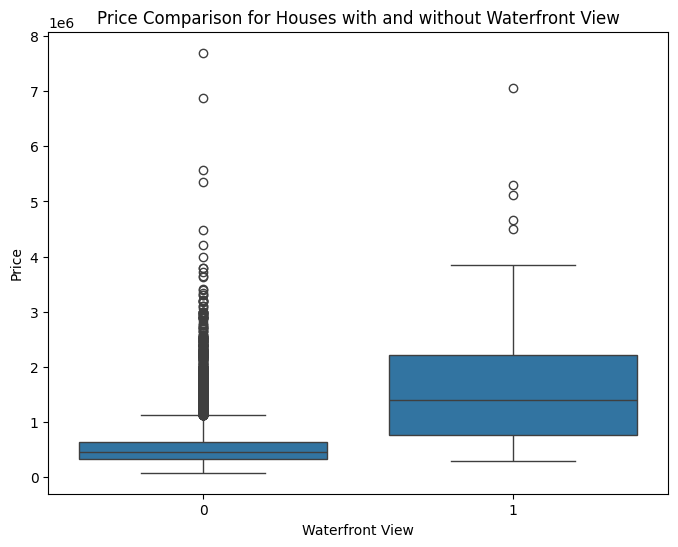

In [27]:
# Create a boxplot to compare prices of houses with and without a waterfront view
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Price Comparison for Houses with and without Waterfront View')
plt.show()


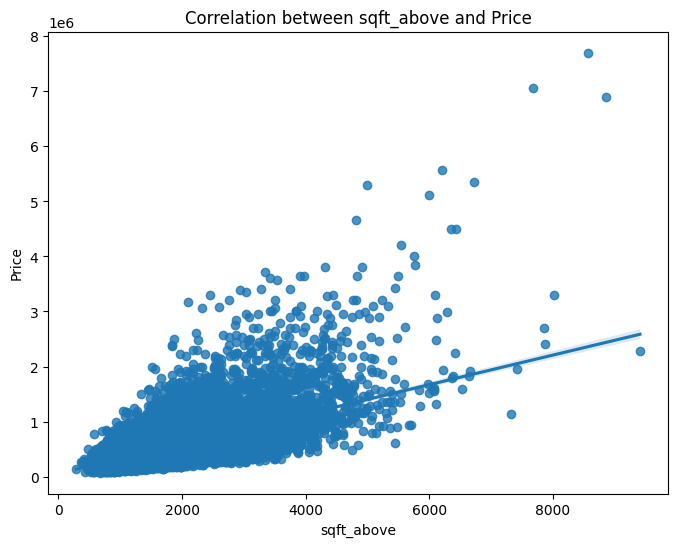

In [28]:
# Create a regplot to check the correlation between sqft_above and price
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('Correlation between sqft_above and Price')
plt.show()


In [30]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define the feature and target variables
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


R^2 Score: 0.4791577237265373


In [31]:
# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define the feature variables
X = df[features]

# Define the target variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


R^2 Score: 0.6515582954034292
